In [1]:
pip install numpy pandas matplotlib scikit-learn  tensorflow


   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.6/331.9 MB 12.5 MB/s eta 0:00:27
   ---------------------------------------- 0.8/331.9 MB 8.3 MB/s eta 0:00:41
   ---------------------------------------- 1.0/331.9 MB 6.8 MB/s eta 0:00:49
   ---------------------------------------- 1.1/331.9 MB 6.0 MB/s eta 0:00:56
   ---------------------------------------- 1.3/331.9 MB 5.5 MB/s eta 0:01:01
   ---------------------------------------- 1.4/331.9 MB 5.4 MB/s eta 0:01:02
   ---------------------------------------- 1.6/331.9 MB 5.2 MB/s eta 0:01:04
   ---------------------------------------- 1.8/331.9 MB 5.0 MB/s eta 0:01:07
   ---------------------------------------- 2.0/331.9 MB 5.0 MB/s eta 0:01:07
   ---------------------------------------- 2.1/331.9 MB 4.9 MB/s eta 0:01:08
   ---------------------------------------- 2.3/331.9 MB 4.8 MB/s eta 0:01:09
   ---------------------------------------- 2.4/331.9 MB 4.7 MB/s eta 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.32.0 requires protobuf<5,>=3.20, but you have protobuf 6.33.1 which is incompatible.


In [2]:
import yfinance as yf
import pandas as pd
# Example: download daily data for Apple
ticker = 'AAPL' # change to your ticker, use '.NS' suffix for NSE e.g.
'RELIANCE.NS'
start = '2015-01-01'
end = '2025-11-15'
df = yf.download(ticker, start=start, end=end, progress=False)
# df columns: ['Open','High','Low','Close','Adj Close','Volume']
# Quick check
print(df.shape)
print(df.head())

C:\Users\Daksh05\AppData\Local\Temp\ipykernel_31612\2373231729.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end, progress=False)


(2735, 5)
Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.237547  24.705316  23.798597  24.694231  212818400
2015-01-05  23.554741  24.086801  23.368521  24.006992  257142000
2015-01-06  23.556955  23.816334  23.195597  23.619029  263188400
2015-01-07  23.887283  23.987044  23.654506  23.765352  160423600
2015-01-08  24.805084  24.862725  24.097887  24.215385  237458000


In [5]:
import numpy as np

# ensure datetime index
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.to_datetime(df.index)

# Basic features
df['return'] = df['Close'].pct_change()
df['log_return'] = np.log(df['Close']) - np.log(df['Close'].shift(1))

# Moving averages and volatility
df['MA_5'] = df['Close'].rolling(window=5).mean()
df['MA_20'] = df['Close'].rolling(window=20).mean()
df['STD_20'] = df['Close'].rolling(window=20).std()

# Momentum
df['momentum_10'] = df['Close'] - df['Close'].shift(10)

# Drop NA
df.dropna(inplace=True)

# Final features list
features = ['Close', 'MA_5', 'MA_20', 'STD_20', 'momentum_10', 'Volume']

print(df[features].head())


Price           Close       MA_5      MA_20    STD_20 momentum_10     Volume
Ticker           AAPL                                                   AAPL
Date                                                                        
2015-01-30  25.973400  25.432914  24.528301  0.796549    2.292290  334982000
2015-02-02  26.299284  25.678105  24.631388  0.885396    2.802179  250956400
2015-02-03  26.303719  26.099763  24.768837  0.922077    2.201395  207662800
2015-02-04  26.505459  26.288202  24.916262  0.953299    2.219137  280598800
2015-02-05  26.694635  26.355299  25.056629  0.999383    1.776493  168984800


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Prepare supervised dataset (shift target by -1)
df_supervised = df.copy()
df_supervised['target'] = df_supervised['Close'].shift(-1)
df_supervised.dropna(inplace=True)
X = df_supervised[features]
y = df_supervised['target']
# Chronological split (no shuffling)
split = int(0.8 * len(X))
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]
# Scale features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Train RandomForest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
# Predict
y_pred = rf.predict(X_test_scaled)
# Put into DataFrame for analysis
pred_df = pd.DataFrame({'actual': y_test, 'predicted': y_pred},
index=y_test.index)
3
# Metrics
mse = mean_squared_error(pred_df['actual'], pred_df['predicted'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(pred_df['actual'], pred_df['predicted'])
r2 = r2_score(pred_df['actual'], pred_df['predicted'])
print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

RMSE: 32.5611, MAE: 24.2806, R2: -0.4525


C:\Users\Daksh05\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 60, 64)              │          18,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,625 (119.63 KB)

 Trainable params: 30,625 (119.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - loss: 6729.6587 - val_loss: 24155.2539
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 6133.8208 - val_loss: 23478.1504
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 5884.0347 - val_loss: 22841.1211
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 5633.4326 - val_loss: 22245.4082
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 5414.9258 - val_loss: 21682.9141
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 5206.9443 - val_loss: 21151.8066
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 5024.3999 - val_loss: 20635.4316
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 4847.1572 - val_loss: 20149.6758
Epoch 9/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 4683.2388 - val_loss: 19670.3965
Epoch 10/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 4513.6855 - val_loss: 19213.5020
Epoch 11/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 4377.9434 - val_lo

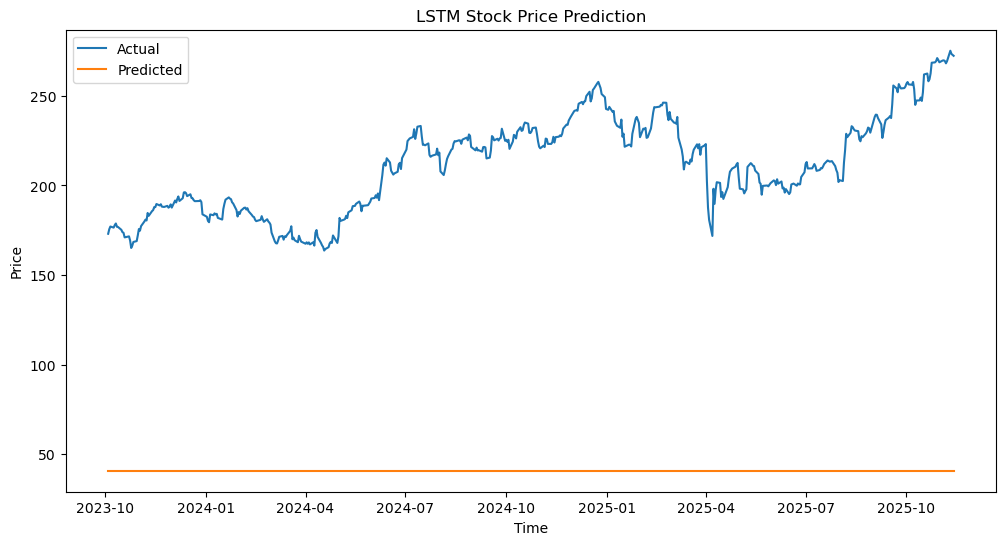

In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# -----------------------------
# 1. Prepare features + target
# -----------------------------
X_full = df[features]
y_full = df['Close'].shift(-1).dropna()

# Align X_full to y_full (remove last row)
X_full = X_full.iloc[:-1]

# -----------------------------
# 2. Scaling
# -----------------------------
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_full)

# -----------------------------
# 3. Create sequences
# -----------------------------
def create_sequences(X, y, seq_len):
    Xs, ys = [], []
    for i in range(len(X) - seq_len):
        Xs.append(X[i : i + seq_len])
        ys.append(y[i + seq_len])
    return np.array(Xs), np.array(ys)

SEQ_LEN = 60  # using past 60 time steps

X_seq, y_seq = create_sequences(X_scaled, y_full.values, SEQ_LEN)

# -----------------------------
# 4. Train-test split
# -----------------------------
split = int(0.8 * len(X_seq))

X_train_seq = X_seq[:split]
X_test_seq = X_seq[split:]

y_train_seq = y_seq[:split]
y_test_seq = y_seq[split:]

# -----------------------------
# 5. Build LSTM Model
# -----------------------------
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(SEQ_LEN, X_train_seq.shape[2])),
    Dropout(0.2),

    LSTM(32),
    Dropout(0.2),

    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# -----------------------------
# 6. Train Model
# -----------------------------
history = model.fit(
    X_train_seq, 
    y_train_seq,
    validation_split=0.1,
    epochs=20,
    batch_size=32
)

# -----------------------------
# 7. Predict
# -----------------------------
y_pred_lstm = model.predict(X_test_seq)

# Flatten to 1D
y_pred_lstm = y_pred_lstm.reshape(-1)
y_test_seq = y_test_seq.reshape(-1)

# -----------------------------
# 8. Create Results DataFrame
# -----------------------------
index_test = df.index[SEQ_LEN + split : SEQ_LEN + split + len(y_pred_lstm)]

results_lstm = pd.DataFrame({
    'actual': y_test_seq,
    'predicted': y_pred_lstm
}, index=index_test)

# -----------------------------
# 9. Metrics
# -----------------------------
mse_l = mean_squared_error(results_lstm['actual'], results_lstm['predicted'])
rmse_l = np.sqrt(mse_l)
mae_l = mean_absolute_error(results_lstm['actual'], results_lstm['predicted'])

print(f"LSTM RMSE: {rmse_l:.4f}, MAE: {mae_l:.4f}")

# -----------------------------
# 10. Visualization
# -----------------------------
plt.figure(figsize=(12, 6))
plt.plot(results_lstm.index, results_lstm['actual'], label='Actual')
plt.plot(results_lstm.index, results_lstm['predicted'], label='Predicted')
plt.title("LSTM Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()


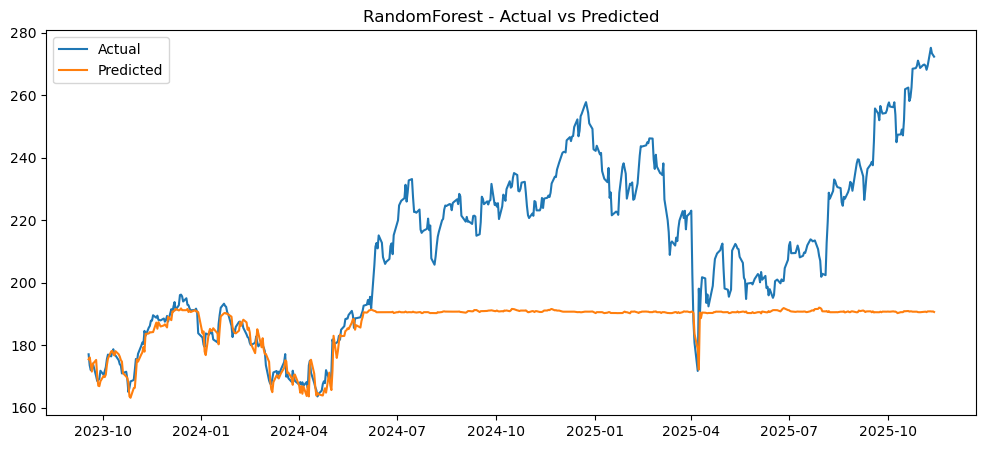

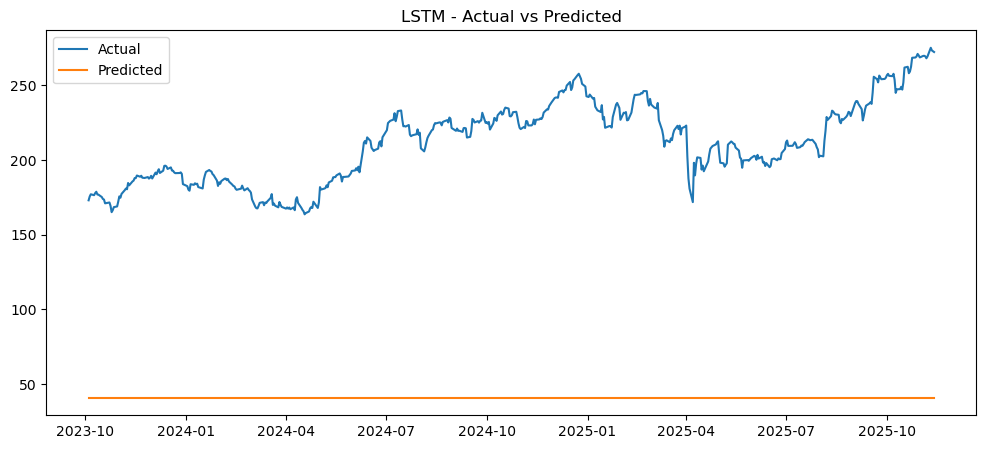

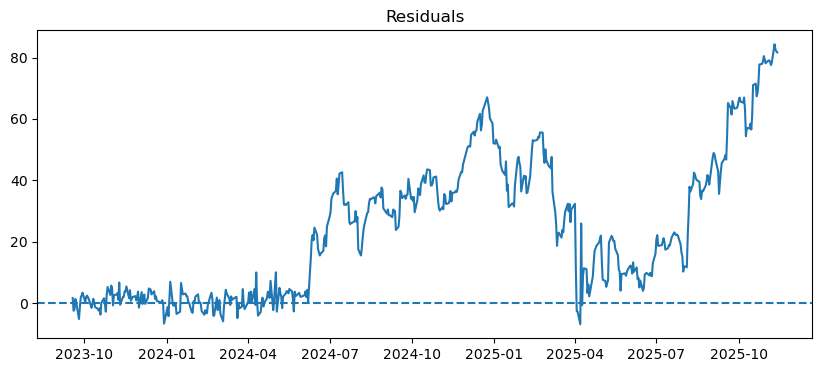

In [11]:
import matplotlib.pyplot as plt
# Actual vs Predicted
plt.figure(figsize=(12,5))
plt.plot(pred_df['actual'], label='Actual')
plt.plot(pred_df['predicted'], label='Predicted')
plt.legend(); plt.title('RandomForest - Actual vs Predicted')
plt.show()
# LSTM plot
plt.figure(figsize=(12,5))
plt.plot(results_lstm['actual'], label='Actual')
plt.plot(results_lstm['predicted'], label='Predicted')
plt.legend(); plt.title('LSTM - Actual vs Predicted')
plt.show()
# Residuals
res = pred_df['actual'] - pred_df['predicted']
plt.figure(figsize=(10,4))
plt.plot(res)
plt.axhline(0, linestyle='--')
plt.title('Residuals')
plt.show()